<a href="https://colab.research.google.com/github/seonae0223/mid_project/blob/main/%5BOneHotEncoding%5DLogistic_Regressor_Linear_Regressor_Gradient_Boost_XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
df = pd.read_csv(FILE_PATH)

# Logistic Regressor

   Metropolitan  Gender  Family_num  Elder_Household  GrandChild_Household  \
0             1       1           1                1                     0   
1             1       0           2                0                     0   
2             1       1           1                0                     0   
3             0       1           1                1                     0   
4             0       0           1                0                     0   

   Single_Household  Multi_Household  Disability_status  Master_WithLive  \
0                 0                0                  0                0   
1                 0                0                  0                1   
2                 0                0                  0                0   
3                 0                0                  0                0   
4                 0                0                  0                0   

   Debt_Holding  ...  Master_MarriCode_3  Master_MarriCode_4  Tenancy_Type

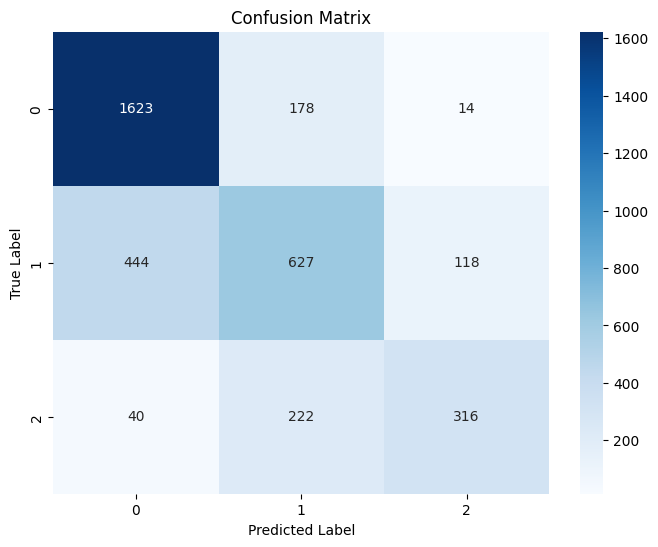

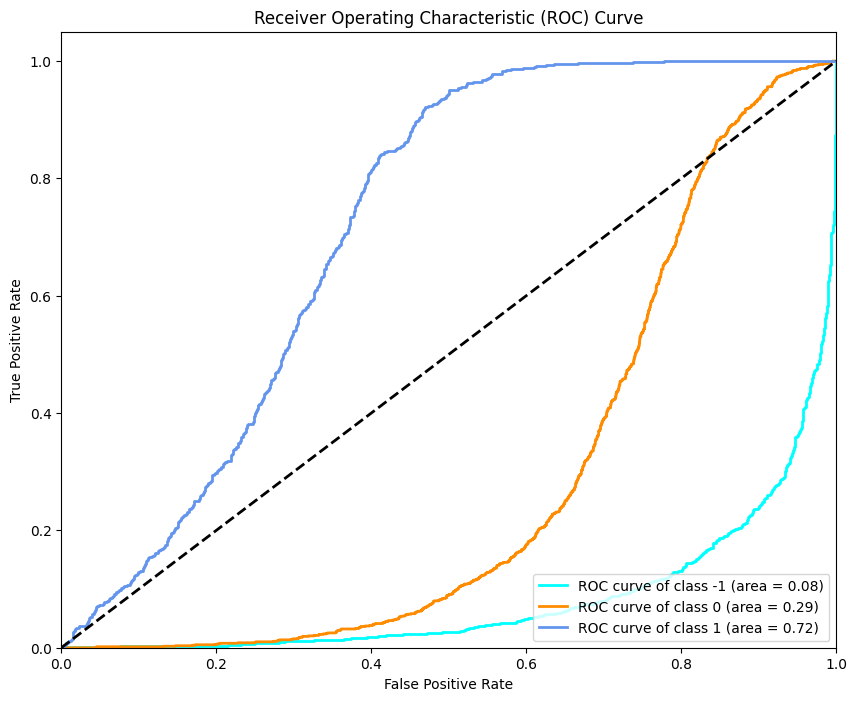

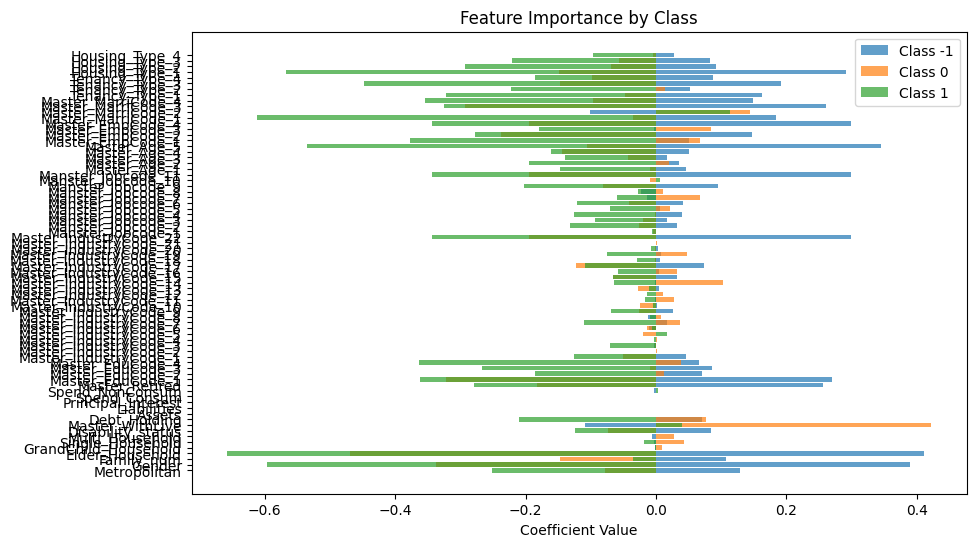


Factor Analysis (Coefficients):

Class -1 - Coefficients:
Metropolitan: 0.1294
Gender: 0.3901
Family_num: 0.1079
Elder_Household: 0.4106
GrandChild_Household: -0.0018
Single_Household: -0.0032
Multi_Household: -0.0058
Disability_status: 0.0842
Master_WithLive: -0.1087
Debt_Holding: 0.0711
Assets: -0.0000
Liabilities: 0.0000
Principal_Interest: 0.0002
Spend_Consum: -0.0005
Spend_NonConsum: -0.0029
Master_Retired: 0.2557
Master_EduCode_1: 0.2694
Master_EduCode_2: 0.0711
Master_EduCode_3: 0.0864
Master_EduCode_4: 0.0664
Master_IndustryCode_1: 0.0454
Master_IndustryCode_2: -0.0003
Master_IndustryCode_3: -0.0031
Master_IndustryCode_4: -0.0003
Master_IndustryCode_5: -0.0003
Master_IndustryCode_6: -0.0102
Master_IndustryCode_7: 0.0164
Master_IndustryCode_8: -0.0119
Master_IndustryCode_9: 0.0268
Master_IndustryCode_10: 0.0020
Master_IndustryCode_11: -0.0010
Master_IndustryCode_12: 0.0002
Master_IndustryCode_13: 0.0049
Master_IndustryCode_14: -0.0017
Master_IndustryCode_15: 0.0319
Master_Indus

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 데이터 확인
print(data.head())
print(data.info())

# 특성과 레이블을 설정 (사용자의 데이터에 맞게 수정 필요)
# 예를 들어, 'label'이 레이블이고 나머지 열이 특성이라고 가정합니다.
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression 모델 초기화
model = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
logloss = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 평가 지표 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC 곡선 및 AUC 계산 및 시각화 (다중 클래스)
fpr = {}
tpr = {}
roc_auc = {}

# unique_classes의 값을 직접 사용
for class_value in np.unique(y_test):
    fpr[class_value], tpr[class_value], _ = roc_curve(y_test == class_value, y_prob[:, class_value])
    roc_auc[class_value] = auc(fpr[class_value], tpr[class_value])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for class_value, color in zip(np.unique(y_test), colors):
    plt.plot(fpr[class_value], tpr[class_value], color=color, lw=2, label=f'ROC curve of class {class_value} (area = {roc_auc[class_value]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 요인 분석: 회귀 계수 출력 및 시각화
coefficients = model.coef_

# 특성 중요도 플롯 (Feature Importance Plot)
plt.figure(figsize=(10, 6))
for i, class_value in enumerate(np.unique(y_test)):
    plt.barh(X.columns, coefficients[i], alpha=0.7, label=f'Class {class_value}')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance by Class')
plt.legend()
plt.show()

print("\nFactor Analysis (Coefficients):")
for i, class_name in enumerate(np.unique(y_test)):
    print(f"\nClass {class_name} - Coefficients:")
    for feature, coef in zip(X.columns, coefficients[i]):
        print(f"{feature}: {coef:.4f}")

# 예측값 출력
predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Prediction Probability': y_prob.max(axis=1)  # 최대 확률을 표시
})

print("\nPredictions:")
print(predictions_df.head(10))  # 상위 10개 예측만 출력


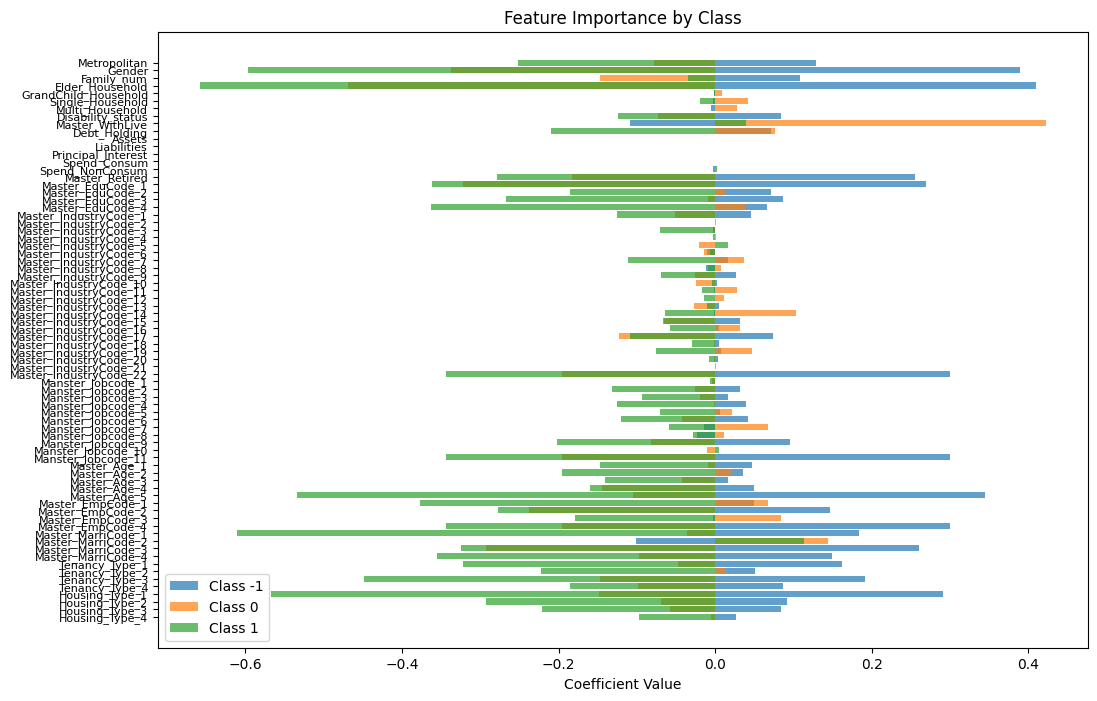

In [9]:
import matplotlib.pyplot as plt

# 특성 중요도 플롯 (Feature Importance Plot)
plt.figure(figsize=(12, 8))  # 플롯 크기 조정
for i, class_value in enumerate(np.unique(y_test)):
    plt.barh(X.columns, coefficients[i], alpha=0.7, label=f'Class {class_value}')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance by Class')
plt.legend()
plt.yticks(fontsize=8)  # y축 라벨 크기 조정
plt.xticks(fontsize=10)  # x축 라벨 크기 조정
plt.gca().invert_yaxis()  # y축 뒤집기 (가장 중요한 특성이 위로 오도록)
plt.show()

   Metropolitan  Gender  Family_num  Elder_Household  GrandChild_Household  \
0             1       1           1                1                     0   
1             1       0           2                0                     0   
2             1       1           1                0                     0   
3             0       1           1                1                     0   
4             0       0           1                0                     0   

   Single_Household  Multi_Household  Disability_status  Master_WithLive  \
0                 0                0                  0                0   
1                 0                0                  0                1   
2                 0                0                  0                0   
3                 0                0                  0                0   
4                 0                0                  0                0   

   Debt_Holding  ...  Master_MarriCode_3  Master_MarriCode_4  Tenancy_Type

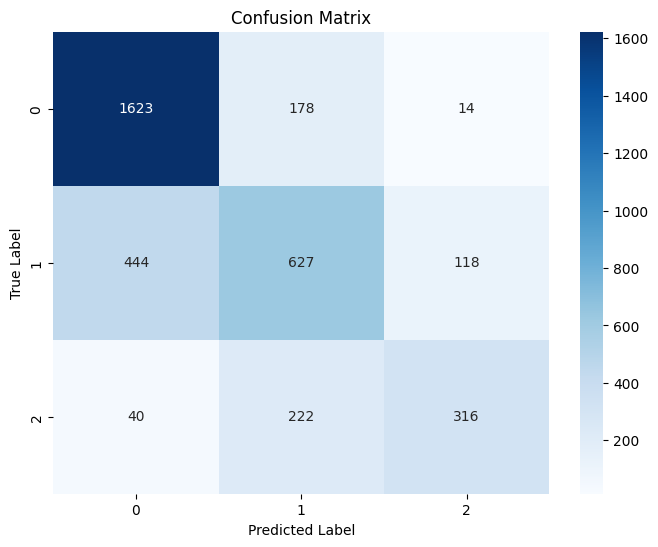

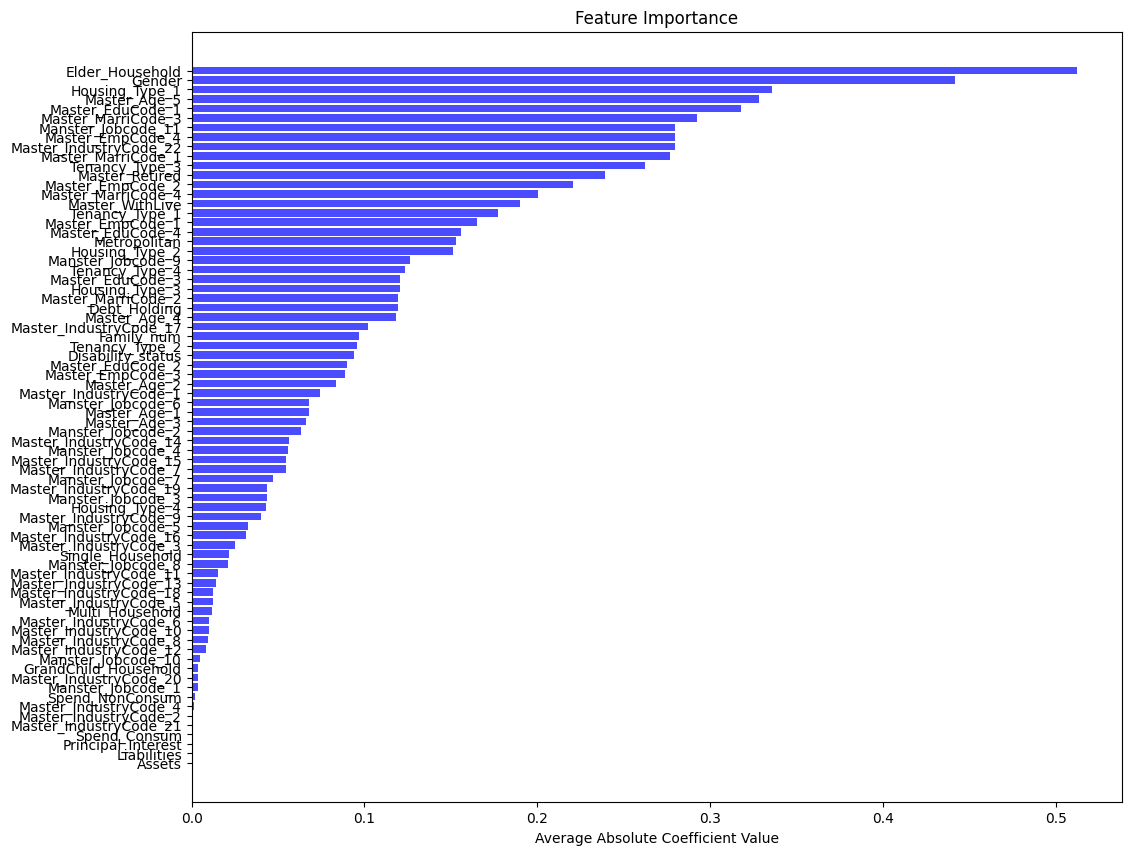


Predictions:
       True Label  Predicted Label  Prediction Probability
6930            1               -1                0.465982
8384           -1               -1                0.740324
7889            1                0                0.495484
357             0                0                0.453885
3753            1                1                0.497807
9410           -1               -1                0.757022
7477            0                0                0.531952
10593           0                0                0.564022
6449            0                0                0.494703
11356          -1               -1                0.944944


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
)
import seaborn as sns

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)


# 데이터 확인
print(data.head())
print(data.info())

# 특성과 레이블을 설정 (사용자의 데이터에 맞게 수정 필요)
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression 모델 초기화
model = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
logloss = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 평가 지표 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 계산 (각 특성의 절대 계수 평균을 사용)
feature_importance = np.mean(np.abs(model.coef_), axis=0)

# 특성 중요도 플롯 (Feature Importance Plot)
plt.figure(figsize=(12, 10))
sorted_idx = np.argsort(feature_importance)  # 중요도에 따라 정렬
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='b', alpha=0.7)
plt.xlabel('Average Absolute Coefficient Value')
plt.title('Feature Importance')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

# 예측값 출력
predictions_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Prediction Probability': y_prob.max(axis=1)  # 최대 확률을 표시
})

print("\nPredictions:")
print(predictions_df.head(10))  # 상위 10개 예측만 출력


In [13]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.8 MB/s eta 0:00:00


Number of features in the dataset: 74


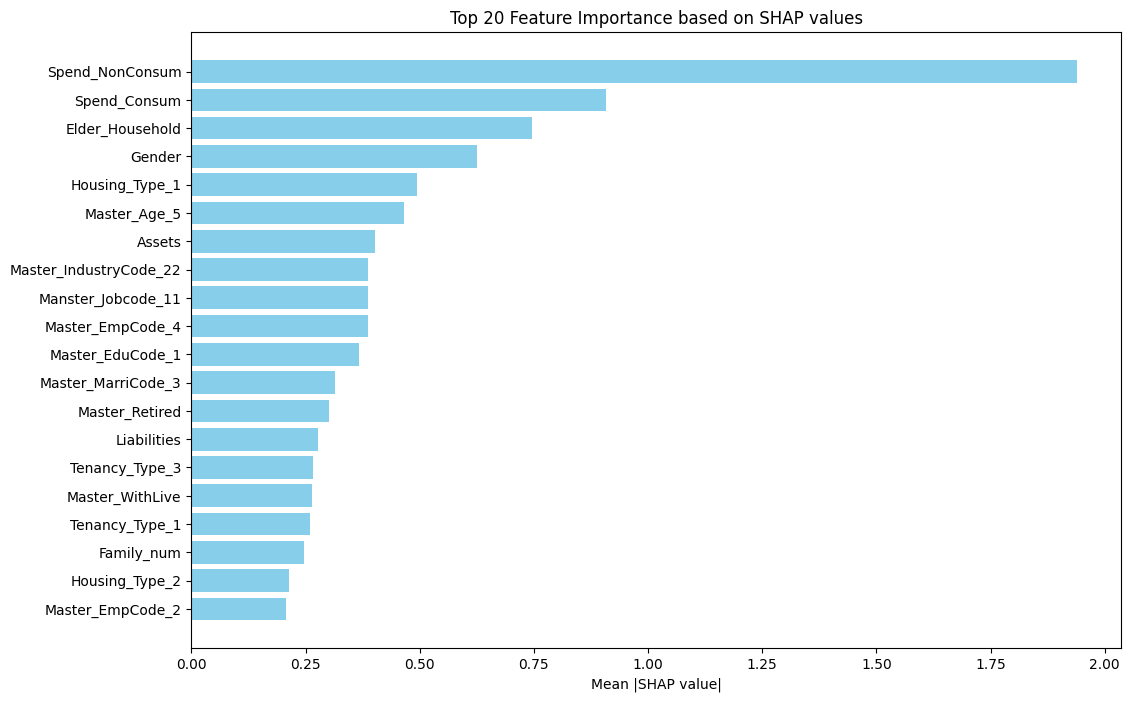

In [43]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 특성 개수 확인
print(f"Number of features in the dataset: {X.shape[1]}")  # 총 특성 개수 확인

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression 모델 초기화 및 학습
model = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# SHAP 분석 수행
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 각 클래스별로 절대 SHAP 값의 평균 계산 후 합산
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# 만약 shap_values가 다차원 배열이면, 필요한 차원으로 압축해야 합니다.
# 클래스가 여러 개인 경우, 다차원 배열일 가능성이 큽니다. 이 경우, 각 클래스에 대한 중요도를 합산합니다.
if len(mean_abs_shap_values.shape) > 1:
    mean_abs_shap_values = mean_abs_shap_values.sum(axis=1)

# 특성 이름과 함께 정렬된 순서로 시각화
sorted_idx = np.argsort(mean_abs_shap_values)

# 상위 20개 특성만 선택
top_n = 20
sorted_idx = sorted_idx[-top_n:]  # 상위 20개 선택

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh([X.columns[i] for i in sorted_idx], mean_abs_shap_values[sorted_idx], color='skyblue')
plt.xlabel('Mean |SHAP value|')
plt.title(f'Top {top_n} Feature Importance based on SHAP values')
plt.show()


Number of features in the dataset: 74
Accuracy: 0.7164
Precision: 0.7068
Recall: 0.7164
F1 Score: 0.7066
ROC AUC Score: 0.8703


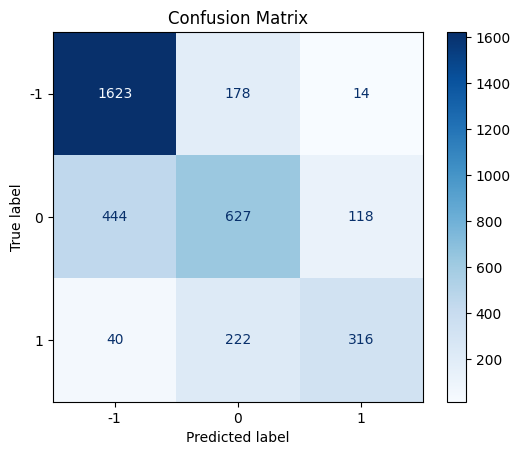

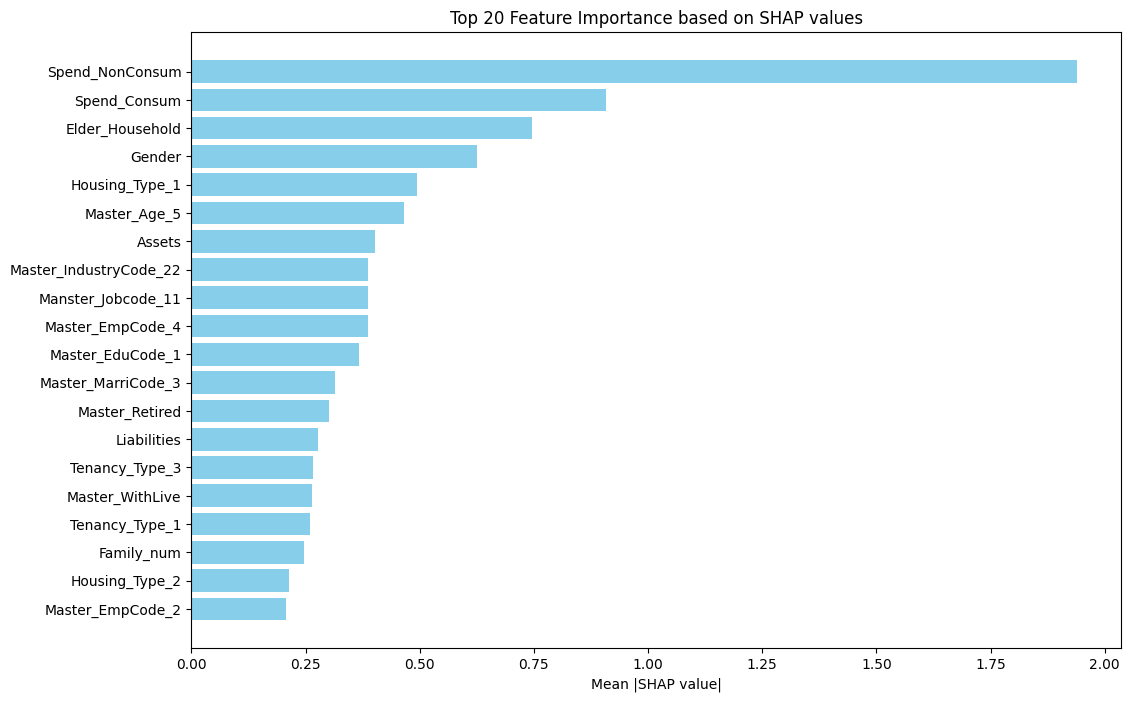

In [44]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 특성 개수 확인
print(f"Number of features in the dataset: {X.shape[1]}")  # 총 특성 개수 확인

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression 모델 초기화 및 학습
model = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# 모델로 예측 수행
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

# 성능 지표 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# SHAP 분석 수행
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 각 클래스별로 절대 SHAP 값의 평균 계산 후 합산
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# 다차원 배열 처리
if len(mean_abs_shap_values.shape) > 1:
    mean_abs_shap_values = mean_abs_shap_values.sum(axis=1)

# 특성 이름과 함께 정렬된 순서로 시각화
sorted_idx = np.argsort(mean_abs_shap_values)

# 상위 20개 특성만 선택
top_n = 20
sorted_idx = sorted_idx[-top_n:]  # 상위 20개 선택

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh([X.columns[i] for i in sorted_idx], mean_abs_shap_values[sorted_idx], color='skyblue')
plt.xlabel('Mean |SHAP value|')
plt.title(f'Top {top_n} Feature Importance based on SHAP values')
plt.show()


# Linear Regression


Class -1 vs Rest


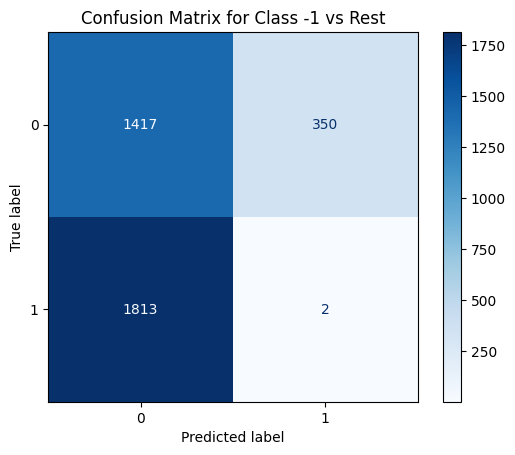

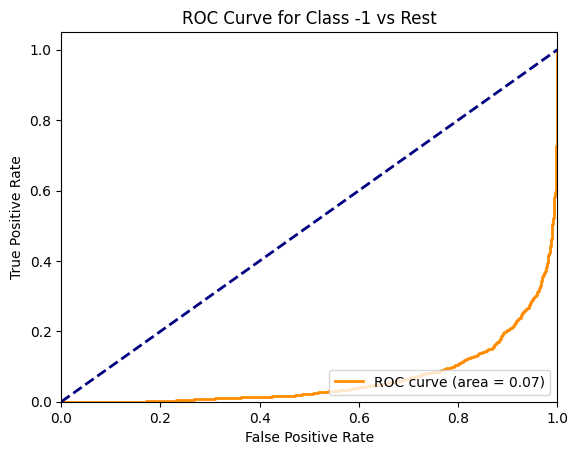


Class 0 vs Rest


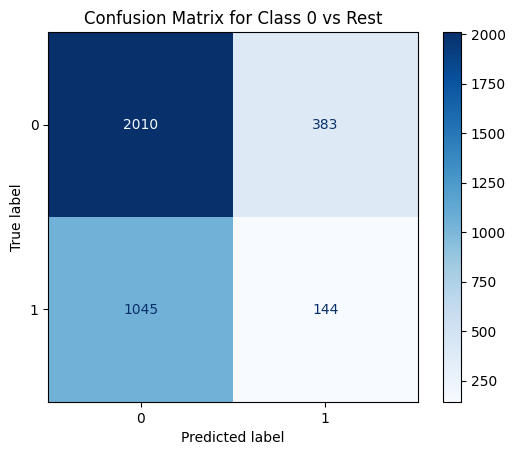

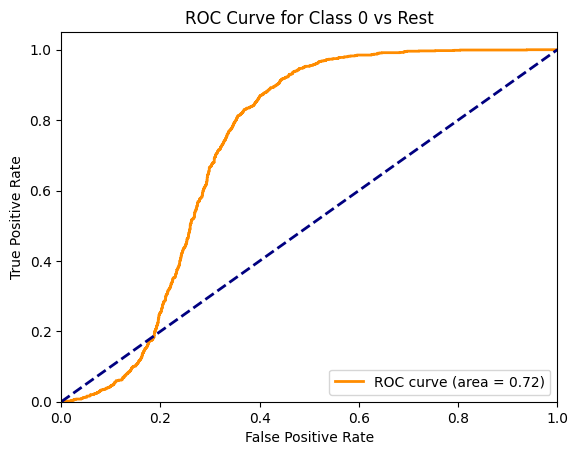


Class 1 vs Rest


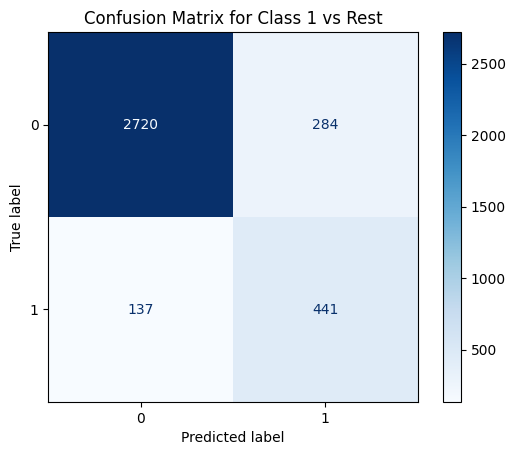

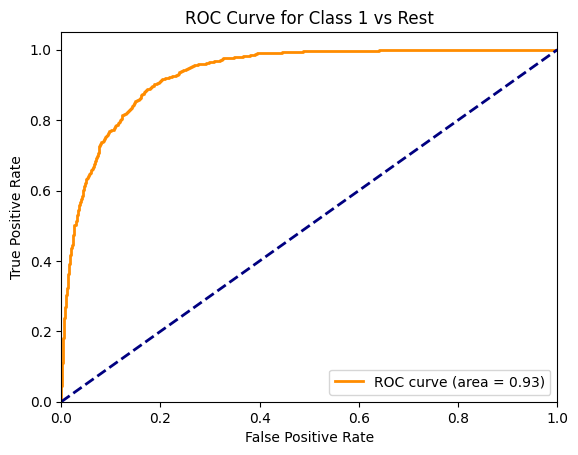

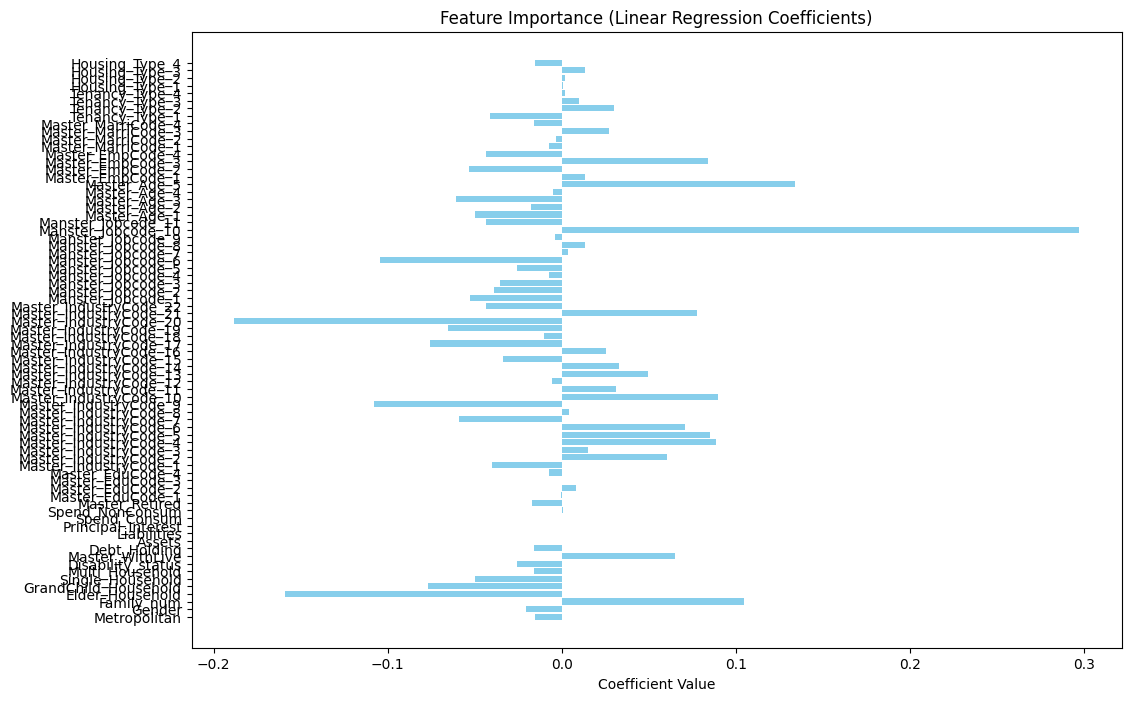

In [49]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 각 클래스에 대해 이진화 및 성능 평가
unique_classes = np.unique(y)
for cls in unique_classes:
    print(f"\nClass {cls} vs Rest")

    # 이진화
    y_test_bin = (y_test == cls).astype(int)
    y_pred_bin = (y_pred >= y_test_bin.mean()).astype(int)

    # 혼동 행렬 계산 및 시각화
    cm = confusion_matrix(y_test_bin, y_pred_bin)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Class {cls} vs Rest')
    plt.show()

    # ROC 곡선 및 AUC 계산
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = roc_auc_score(y_test_bin, y_pred)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {cls} vs Rest')
    plt.legend(loc="lower right")
    plt.show()

# 특성 중요도 (회귀 계수)
importance = model.coef_

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh(X.columns, importance, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 각 클래스에 대해 이진화 및 성능 평가
performance_metrics = []

unique_classes = np.unique(y)
for cls in unique_classes:
    # 이진화
    y_test_bin = (y_test == cls).astype(int)
    y_pred_bin = (y_pred >= y_test_bin.mean()).astype(int)

    # 혼동 행렬 계산
    cm = confusion_matrix(y_test_bin, y_pred_bin)

    # 성능 지표 계산
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    precision = precision_score(y_test_bin, y_pred_bin)
    recall = recall_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin)
    roc_auc = roc_auc_score(y_test_bin, y_pred)

    # 결과 저장
    performance_metrics.append({
        'Class': cls,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    })

# 성능 지표 출력
for metrics in performance_metrics:
    print(f"Class {metrics['Class']} vs Rest:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")

# 특성 중요도 (회귀 계수)
importance = model.coef_

# 특성 중요도 출력
print("Feature Importance (Linear Regression Coefficients):")
for feature, coef in zip(X.columns, importance):
    print(f"  {feature}: {coef:.4f}")


Class -1 vs Rest:
  Accuracy: 0.3961
  Precision: 0.0057
  Recall: 0.0011
  F1 Score: 0.0018
  ROC AUC: 0.0670
  Confusion Matrix:
[[1417  350]
 [1813    2]]

Class 0 vs Rest:
  Accuracy: 0.6013
  Precision: 0.2732
  Recall: 0.1211
  F1 Score: 0.1678
  ROC AUC: 0.7242
  Confusion Matrix:
[[2010  383]
 [1045  144]]

Class 1 vs Rest:
  Accuracy: 0.8825
  Precision: 0.6083
  Recall: 0.7630
  F1 Score: 0.6769
  ROC AUC: 0.9324
  Confusion Matrix:
[[2720  284]
 [ 137  441]]

Feature Importance (Linear Regression Coefficients):
  Metropolitan: -0.0157
  Gender: -0.0204
  Family_num: 0.1045
  Elder_Household: -0.1592
  GrandChild_Household: -0.0771
  Single_Household: -0.0502
  Multi_Household: -0.0161
  Disability_status: -0.0257
  Master_WithLive: 0.0650
  Debt_Holding: -0.0162
  Assets: 0.0000
  Liabilities: -0.0000
  Principal_Interest: -0.0000
  Spend_Consum: 0.0001
  Spend_NonConsum: 0.0008
  Master_Retired: -0.0173
  Master_EduCode_1: -0.0007
  Master_EduCode_2: 0.0081
  Master_EduCode

#Gradient Boost


Accuracy: 0.7672
Precision: 0.7665
Recall: 0.7672
F1 Score: 0.7661
ROC AUC Score: 0.9039


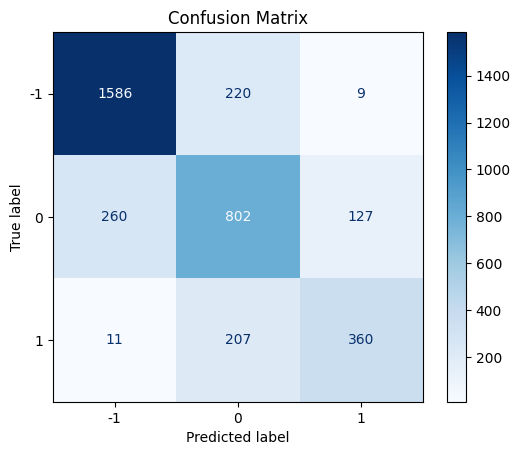

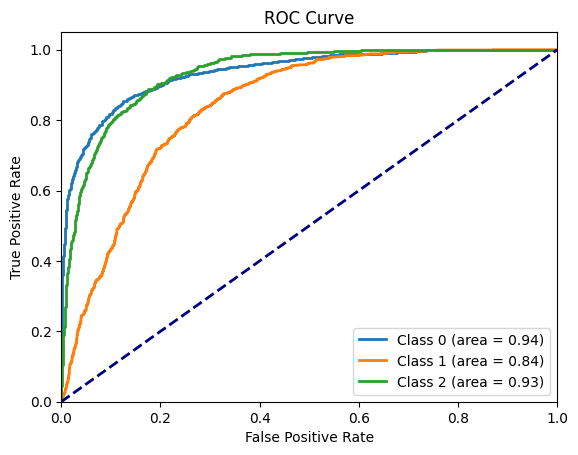

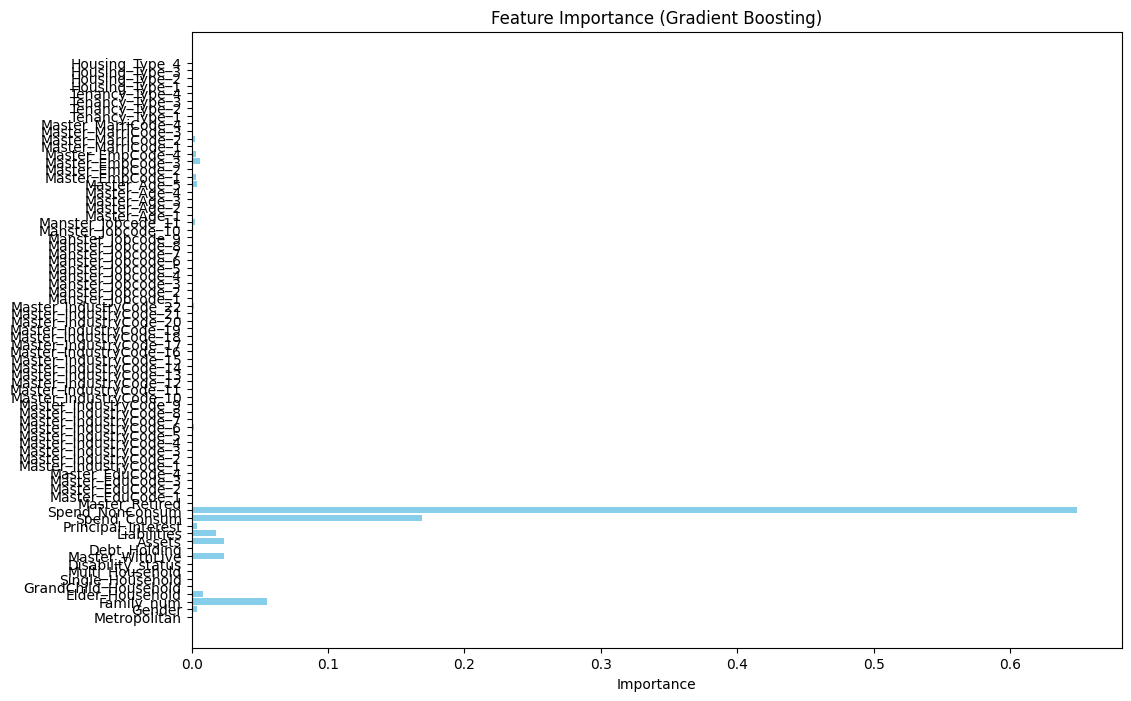

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting 모델 초기화 및 학습
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

# 성능 지표 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC 곡선 및 AUC 계산 (다중 클래스)
fpr = {}
tpr = {}
roc_auc = {}

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 특성 중요도 (Feature Importance)
importance = model.feature_importances_

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh(X.columns, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()


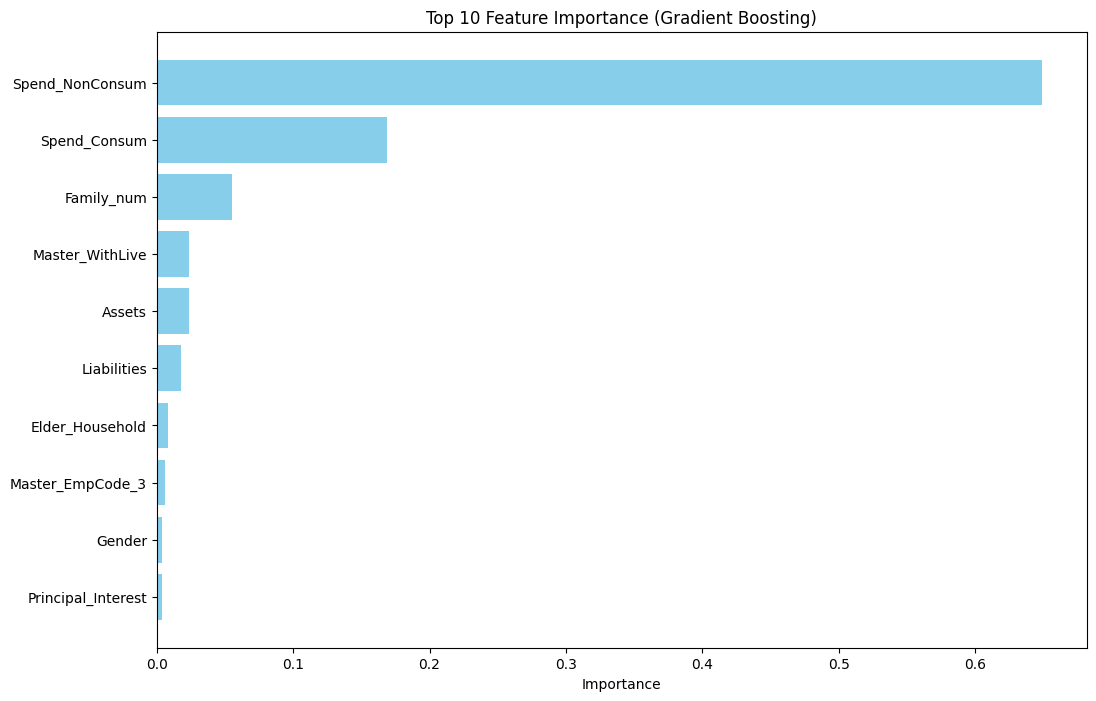

In [54]:
# 특성 중요도 (Feature Importance)
importance = model.feature_importances_

# 중요도에 따라 내림차순으로 정렬된 상위 10개 특성의 인덱스 선택
sorted_idx = np.argsort(importance)[-10:]

# 상위 10개 특성과 그 중요도를 추출
top_features = X.columns[sorted_idx]
top_importance = importance[sorted_idx]

# 중요도에 따라 내림차순으로 정렬
sorted_idx = np.argsort(top_importance)
top_features = top_features[sorted_idx]
top_importance = top_importance[sorted_idx]

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance (Gradient Boosting)')
plt.show()


# XG Boost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:47:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7527
Precision: 0.7517
Recall: 0.7527
F1 Score: 0.7514
ROC AUC Score: 0.8985


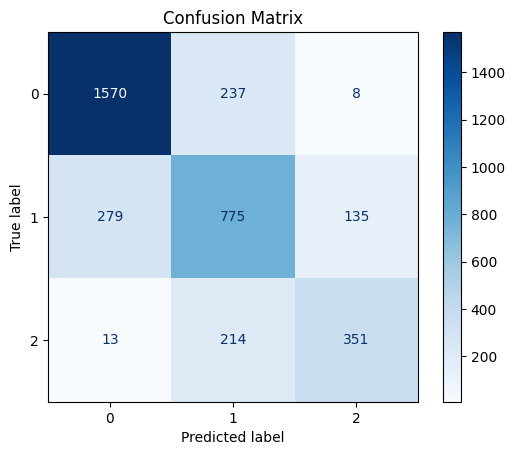

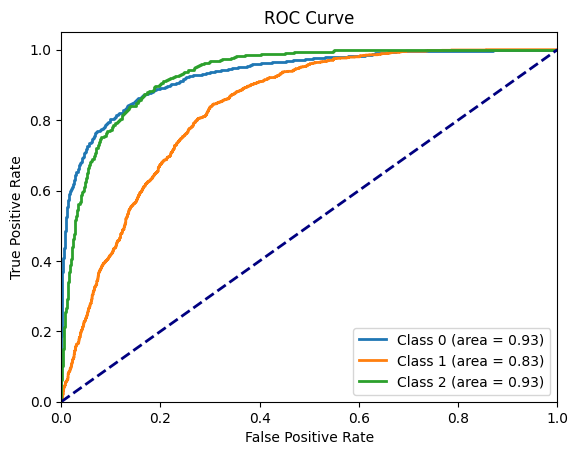

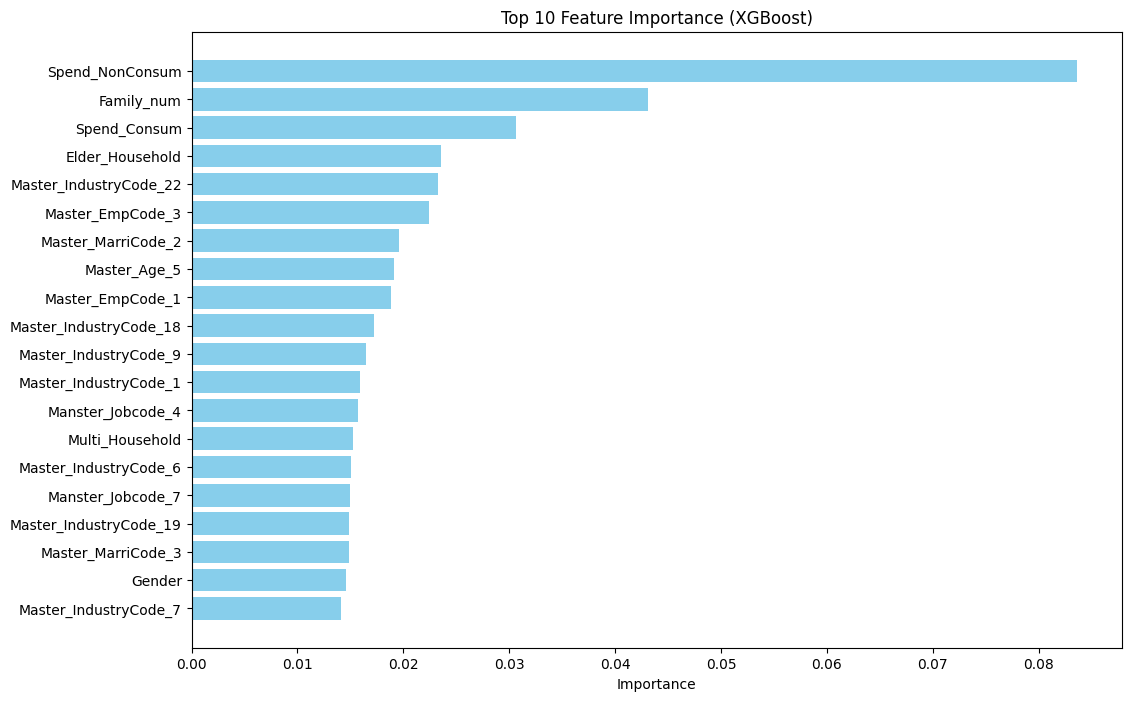

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize

# 데이터 불러오기
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/한경_MLOps/머신러닝/중간프로젝트/data/trisected.csv'
data = pd.read_csv(FILE_PATH)

# 특성과 레이블을 설정
X = data.drop('Income_code', axis=1)  # 특성 (Features)
y = data['Income_code']  # 레이블 (Labels)

# 클래스 값을 0, 1, 2로 변환
y = y - y.min()

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# XGBoost 모델 초기화 및 학습
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

# 성능 지표 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC 곡선 및 AUC 계산 (다중 클래스)
fpr = {}
tpr = {}
roc_auc = {}

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 특성 중요도 (Feature Importance)
importance = model.feature_importances_

# 중요도에 따라 내림차순으로 정렬된 상위 10개 특성의 인덱스 선택
sorted_idx = np.argsort(importance)[-20:]

# 상위 10개 특성과 그 중요도를 추출
top_features = X.columns[sorted_idx]
top_importance = importance[sorted_idx]

# 중요도에 따라 내림차순으로 정렬
sorted_idx = np.argsort(top_importance)
top_features = top_features[sorted_idx]
top_importance = top_importance[sorted_idx]

# 수평 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance (XGBoost)')
plt.show()
